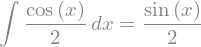

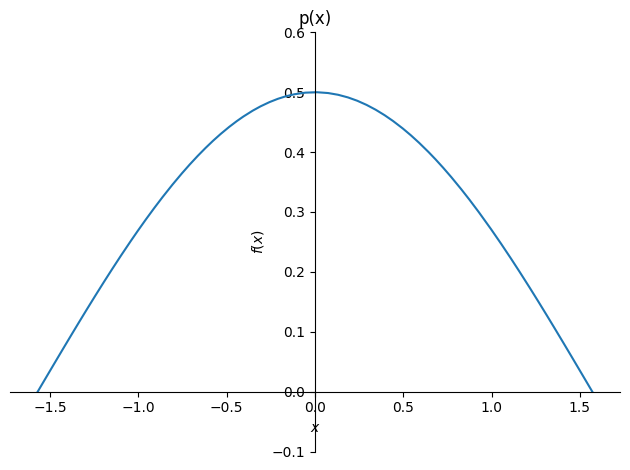

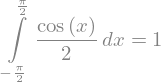

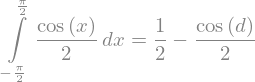

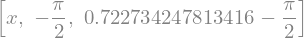

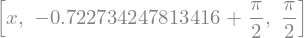

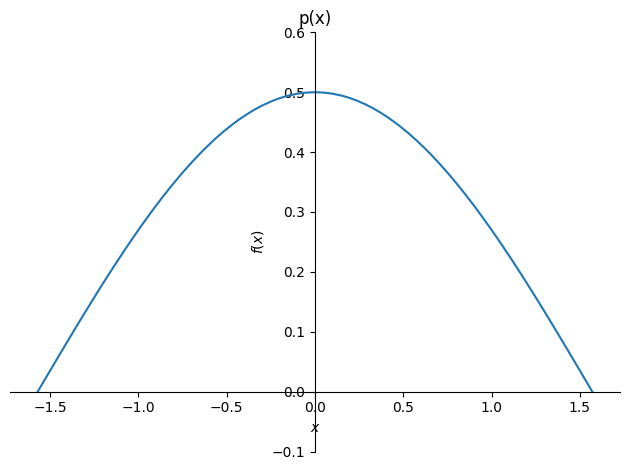

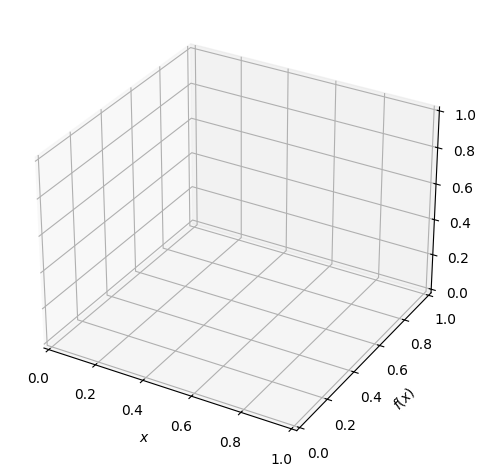

In [84]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

sp.init_printing(use_latex=True)
# Define the probability density function
x = sp.Symbol('x')

p = sp.cos(x)/2
range_x = (x, -sp.pi/2, sp.pi/2)
p_func = sp.Lambda(x, p)
tau_alpha = sp.Symbol('tau_alpha')
# Define the level α
alpha = 0.25

integral_p = sp.Integral(p, x).doit()

#display the integral of p(x) with integral symol
display(sp.Eq(sp.Integral(p, x), integral_p))
sp.plot(p, range_x, title='p(x)', show=True, ylim=[-0.1,0.6])

integral_step2 = sp.Eq(sp.Integral(p, range_x), integral_p.subs(range_x[0], range_x[2]) - integral_p.subs(range_x[0], range_x[1]))
display(integral_step2)
# Calculate the threshold τₐ

#using symmetry solve for y where the integral from -y to 0 is equal to alpha/2
d = sp.Symbol('d')
#symmetry range
range_sym = (x, -sp.pi/2, -sp.pi/2 + d)
integral_step3 =  sp.Eq(sp.Integral(p, range_x), integral_p.subs(range_sym[0], range_sym[2]) - integral_p.subs(range_sym[0], range_sym[1]))
display(integral_step3)

d_val = sp.solve(integral_step3.rhs - alpha/2, d)[0]
display(d_val)

left_range = [x, range_sym[1], range_sym[2].subs(d, d_val)]
right_range = [x, -range_sym[2].subs(d, d_val), -range_sym[1]]
display(left_range)
display(right_range)

tau_alpha = p.subs(x, left_range[2])
display(tau_alpha)

# Plot the probability density function
p_func = sp.Lambda(x, p)
plot1 = sp.plot(p, range_x, title='p(x)', show=True, ylim=[-0.1,0.6])
#add vertical line for d_val
plot1.append(sp.plot(0.25, (x, -d_val, d_val), line_color='red', show=False))
sp.plot(0.25, (x,-1,1), (y, -0.1, -0.6), line_color='red', show=False)
sp.plot()
